Long Prompt Weighting Stable Diffusion

When inputting a prompt without the 77 token length limit, you can include text-to-image (tx2img), image-to-image (img2img), and inpainting pipelines. You can emphasize or weigh part of your prompt by using parentheses, such as "a baby deer with (big eyes)". If you want to de-emphasize part of your prompt, you can use square brackets, like "a [baby] deer with big eyes". 

For precise weighting, you can adjust the emphasis with a specific value, for example, "a baby deer with (big eyes:1.3)". Prompt weighting equivalents include "a baby deer with" being equivalent to "(a baby deer with:1.0)", "(big eyes)" being equivalent to "(big eyes:1.1)", "((big eyes))" being equivalent to "(big eyes:1.21)", and "[big eyes]" being equivalent to "(big eyes:0.91)". This allows for flexible control over the importance of different elements in your prompts.

This script was contributed by [SkyTNT](https://github.com/SkyTNT) and the notebook by [ParagEkbote](https://github.com/ParagEkbote).


In [1]:
pip install diffusers torch

Note: you may need to restart the kernel to use updated packages.


model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

v0.31.0/lpw_stable_diffusion.py:   0%|          | 0.00/74.7k [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/819 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (108 > 77). Running this sequence through the model will result in indexing errors


  0%|          | 0/50 [00:00<?, ?it/s]

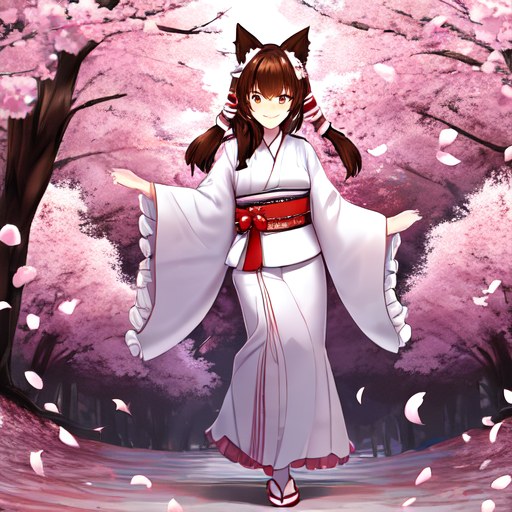

In [2]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    'hakurei/waifu-diffusion',
    custom_pipeline="lpw_stable_diffusion",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

prompt = "best_quality (1girl:1.3) bow bride brown_hair closed_mouth frilled_bow frilled_hair_tubes frills (full_body:1.3) fox_ear hair_bow hair_tubes happy hood japanese_clothes kimono long_sleeves red_bow smile solo tabi uchikake white_kimono wide_sleeves cherry_blossoms"
neg_prompt = "lowres, bad_anatomy, error_body, error_hair, error_arm, error_hands, bad_hands, error_fingers, bad_fingers, missing_fingers, error_legs, bad_legs, multiple_legs, missing_legs, error_lighting, error_shadow, error_reflection, text, error, extra_digit, fewer_digits, cropped, worst_quality, low_quality, normal_quality, jpeg_artifacts, signature, watermark, username, blurry"

pipe.text2img(prompt, negative_prompt=neg_prompt, width=512, height=512, max_embeddings_multiples=3).images[0]